# Analysis of the 2009 Flight Data Expo 
## by Bryan Beus

## Investigation Overview

This investigation observes and studies the `AirTime`, `DepDelay`, and `Origin` features of the provided dataset. 

## Dataset Overview

The 2009 Flight Data Expo provides information on flights in Northern America, with a focus on information regarding delays and cancellations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('DataExpo2009/2008.csv', nrows=50000)

In [4]:
df_clean = df.copy()

## AirTime Feature

The `AirTime` values are highly skewed to the right, therefore the logarithmic scale is appropriate for the x-axis. 

The mode appears to be approximately `50` minutes. There appears to be a slight secondary peak in the data at approximatley `200` minutes.

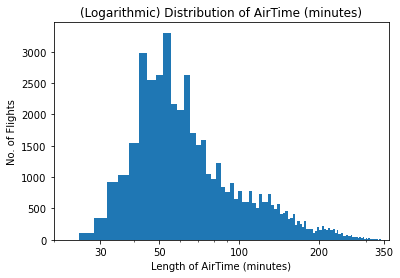

In [16]:
log_binsize = 5;
xtick_vals = 10 ** np.arange(df_clean['AirTime'].min() - 5, np.log10(df_clean['AirTime'].max()) + log_binsize, log_binsize)

plt.hist(data=df_clean, x='AirTime', bins=100);
plt.xscale('log');
plt.title('(Logarithmic) Distribution of AirTime (minutes)');
plt.xlim(df_clean['AirTime'].min() - 5, df_clean['AirTime'].max() + 5);
plt.ylabel('No. of Flights');
plt.xlabel('Length of AirTime (minutes)');
plt.xticks([30, 50, 100, 200, 350], [30, 50, 100, 200, 350]);
plt.show();

## DepDelay Feature

The `DepDelay` values are highly skewed to the right, but many of the values are negative (wherein flights departed ahead of schedule). Therefore, the logarithmic scale is not appropriate for the x-axis. However, the y axis values are too spread out, and therefore a logarithmic scale is more appropriate.

The mode appears to be approximately `10` minutes. 

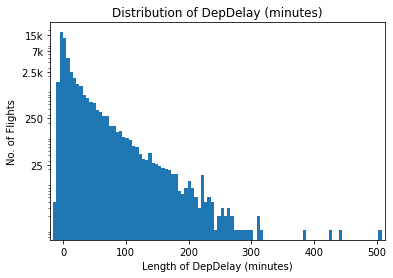

In [15]:
plt.hist(data=df_clean, x='DepDelay', bins=100);
plt.yscale('log');
plt.title('Distribution of DepDelay (minutes)');
plt.xlim(df_clean['DepDelay'].min() - 5, df_clean['DepDelay'].max() + 5);
plt.ylabel('No. of Flights');
plt.xlabel('Length of DepDelay (minutes)');
plt.yticks([25, 250, 2500, 7000, 15000], [25, 250, '2.5k', '7k', '15k']);
plt.show();

## Five Most Common Origins

The five most common origins are LAS (Los Angelos), MDW (Chicago), PHX (Phoenix), BWI (Maryland), and HOU (Houston).


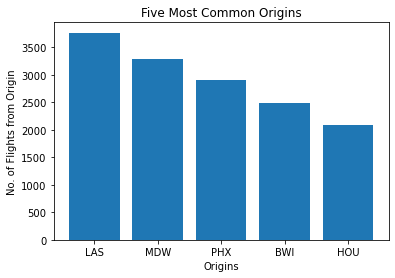

In [14]:
x = df_clean['Origin'].value_counts().index[:5]
y = df_clean['Origin'].value_counts()[:5]

plt.bar(x, y);
plt.title('Five Most Common Origins');
plt.xlabel('Origins');
plt.ylabel('No. of Flights from Origin');
plt.show();

## Five Least Common Origins

The five least common origins are HRL (Texas), RSW (Florida), IAD (Virginia/DC), JAN (Mississippi), and CRP (Texas).

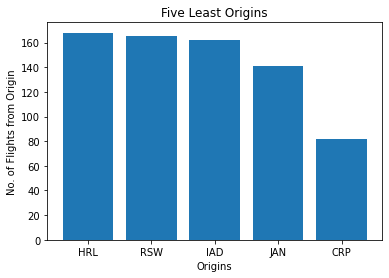

In [13]:
x = df_clean['Origin'].value_counts().index[-5:]
y = df_clean['Origin'].value_counts()[-5:]

plt.bar(x, y);
plt.title('Five Least Origins');
plt.xlabel('Origins');
plt.ylabel('No. of Flights from Origin');
plt.show();

## Bivariate Exploration

Note that the three highest origins were all seen previously in the Most Common Origins graph, but the next two  origins were not seen. 

This raises questions about why these two airports are underperforming.

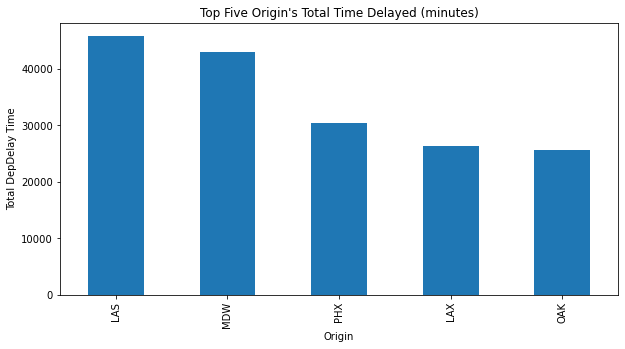

In [12]:
top_five = df_clean.groupby('Origin').DepDelay.sum().sort_values(ascending=False).iloc[:5]
top_five.plot(kind='bar', figsize=(10, 5));
plt.title('Top Five Origin\'s Total Time Delayed (minutes)');
plt.xlabel('Origin');
plt.ylabel('Total DepDelay Time');
plt.show();

## Multivariate

`AirTime` and `DepDelay` values are plotted against each other as a scatter plot, and the scatter points are given a hue color according to `Origin`.

A casual glance at the image could lead the viewer to interpret that higher-value departure delays are most often associated with the hue for `MDW`.

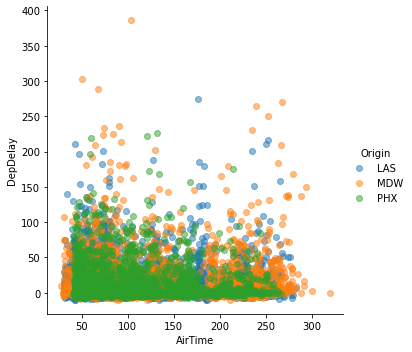

In [11]:
df_sub = df_clean[df_clean['Origin'].isin(top_five.index[:3])].copy()
m = sb.FacetGrid(data = df_sub, hue='Origin', height=5);
m.map(plt.scatter, 'AirTime', 'DepDelay', alpha=0.5);
m.add_legend();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!